#  Exploring Factors that Influence Life Expectancy

<b> Group 23

Group member: Hannah Martin, Malachy Montemurro, Camilla Ren, Malcom Maxwell

## Introduction

As humans, we continuously struggle with the notion of death, death is perhaps the only thing in life that is absolute, yet many endlessly fight against this knowing, trying to delay/prolong the inevitable. There is a plethora of information, be it in formal studies, novels or even social media posts, that discuss the choices and lifestyle habits that individuals make that can either prolong your life, for example diet (Fadness et al, 2022), or shorten your life, for example substance abuse (Avendano & Jawachi, 2014). Obviously, there is an endless list of variables that contribute to living a long, healthy life, many of which we cannot control, like which country you are born into (Freeman et al., 2020). That being said, one can only benefit from having more information on the so called “do’s” and “don'ts”. As such, we have decided to conduct an analysis on the World Health Organization’s Life Expectancy data (https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who), which is a public data set, including information on 193 out of the 195 countries, in order to explore factors that significantly contribute to a country’s average life expectancy. Our analysis will be conducted using linear regression, using the Life Expectancy variable of the above mentioned dataset as our response variable. The question of focus for this analysis is, which variables/factors influence life expectancy the most for underdeveloped and developed countries (i.e. fit the regression model the best), and how well do these variables predict life expectancy. As such, this will be both a predictive and inferential analysis, and will explore many explanatory variables, including, but not limited to: Adult Mortality Rate, Country Status (developing or developed), Percentage Expendature’s (health costs by country).

<b> Question: <b>

Which variables/factors influence life expectancy the most for underdeveloped and developed countries (i.e. fit the regression model the best), and how well do these variables predict life expectancy?

## Preliminary Results

In [1]:
install.packages("tidymodels")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
install.packages("rlang")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
# Load package
library(tidyverse)
library(repr)
library(readxl)
library(infer)
library(cowplot)
library(GGally)
library(broom)
library(tidymodels)

# Set seed
set.seed(123)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ dials        1.0.0     ✔ tune         1.0.1
✔ modeldata    1.0.1     ✔ workflows    1.1.0
✔ parsnip      1.0.2     ✔ workflowsets 1.0.0
✔ recipes      1.0.1     ✔ yardstick    1.1.0
✔ rsample      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks 

#### 1. Load Data

In [4]:
# Read the life expectancy data and name it as "life_exp"
life_exp <- read_csv("https://shorturl.at/FV478")
head(life_exp)

# Compute number of rows
number_rows <- life_exp %>%
               nrow()
number_rows

Rows: 2938 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country, Status
dbl (20): Year, Life expectancy, Adult Mortality, infant deaths, Alcohol, pe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,⋯,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


[1] 2938

#### 2. Clean and Wrangle Data

In [5]:
# Convert "country" and "status" variables to factor
life_exp <- life_exp %>%
           mutate(Country = as.factor(Country)) %>% 
            mutate(Status = as.factor(Status))

# Remove NAs
life_exp <- life_exp %>%
            na.omit(life_exp)
head(life_exp)

# Compute number of rows
number_rows_cleaned <- life_exp %>%
                        nrow()

number_rows_cleaned

Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,⋯,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


[1] 1649

In [6]:
# rename response variable to standard naming convention

colnames(life_exp)[colnames(life_exp)== "Life expectancy"] <- "life_expectancy"
colnames(life_exp)[colnames(life_exp)== "thinness  1-19 years"] <- "thin_1_19"
colnames(life_exp)[colnames(life_exp)== "thinness 5-9 years"] <- "thin_5_9"    
colnames(life_exp)[colnames(life_exp)== "HIV/AIDS"] <- "hiv_aids"
colnames(life_exp)[colnames(life_exp)== "Income composition of resources"] <- "income_comp_resources"

# split into test / train datasets

df_split <- initial_split(life_exp, prop=0.8, strata= life_expectancy)

df_train <- training(df_split)
df_test <- testing(df_split)

#### 3. Statistics of Data

In [7]:
summary(df_train)

             Country          Year             Status     life_expectancy
 Honduras        :  15   Min.   :2000   Developed : 189   Min.   :44.00  
 Papua New Guinea:  15   1st Qu.:2004   Developing:1129   1st Qu.:64.40  
 Armenia         :  14   Median :2008                     Median :71.70  
 Austria         :  14   Mean   :2008                     Mean   :69.26  
 Colombia        :  14   3rd Qu.:2011                     3rd Qu.:74.90  
 Luxembourg      :  14   Max.   :2015                     Max.   :89.00  
 (Other)         :1232                                                   
 Adult Mortality infant deaths        Alcohol        percentage expenditure
 Min.   :  1.0   Min.   :   0.00   Min.   : 0.0100   Min.   :    0.00      
 1st Qu.: 77.0   1st Qu.:   1.00   1st Qu.: 0.8125   1st Qu.:   35.94      
 Median :148.0   Median :   3.00   Median : 3.7400   Median :  137.29      
 Mean   :167.9   Mean   :  33.17   Mean   : 4.5001   Mean   :  664.35      
 3rd Qu.:226.8   3rd Qu.:  2

#### 4. Data Visualization

In [8]:
install.packages('corrplot')
library(corrplot)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

corrplot 0.92 loaded



In [ ]:
options(repr.plot.width = 60, repr.plot.height = 60)

relationship_plot <- df_train %>% select(-Country) %>%
ggpairs(upper=list(continuous = wrap("cor", size=9)))

relationship_plot 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

In [9]:
#options(repr.plot.width = 30, repr.plot.height = 30)

  
df_train_num <- df_train %>% select(-Country, -Status)

cor_table <- cor(df_train_num)
cor_table

,Year,life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,hiv_aids,GDP,Population,thin_1_19,thin_5_9,income_comp_resources,Schooling
Year,1.00000000,0.06003249,-0.05410148,0.021994674,-0.10860065,0.06963606,0.09873302,-0.03896767,0.01230121,0.02444932,-0.01977786,0.04822623,0.01450304,-0.132874507,0.10062422,0.02413702,0.02040255,0.02106129,0.12758143,0.09037000
life_expectancy,0.06003249,1.00000000,-0.69283002,-0.166937559,0.40750110,0.40127549,0.20800276,-0.05650492,0.53818449,-0.18936989,0.31516613,0.17319966,0.33649489,-0.594819587,0.42871576,-0.02275181,-0.43966182,-0.43640142,0.71723508,0.71938687
Adult Mortality,-0.05410148,-0.69283002,1.00000000,0.026821750,-0.17301865,-0.22911484,-0.10288812,-0.03198533,-0.34176741,0.04359685,-0.17443134,-0.07594931,-0.18802423,0.556666746,-0.24547156,-0.02113676,0.25069370,0.26130205,-0.43551299,-0.40536093
infant deaths,0.02199467,-0.16693756,0.02682175,1.000000000,-0.10139648,-0.08712281,-0.23378819,0.56636765,-0.22462680,0.99694240,-0.15379337,-0.14578328,-0.16421458,0.003965265,-0.09211923,0.65413632,0.48505615,0.47666226,-0.13344411,-0.20996352
Alcohol,-0.10860065,0.40750110,-0.17301865,-0.101396479,1.00000000,0.42663538,0.12516510,-0.04363329,0.36203325,-0.09650578,0.24178734,0.22223102,0.24127096,-0.028540305,0.44513229,-0.01999789,-0.40362814,-0.38413808,0.57100786,0.62549751
percentage expenditure,0.06963606,0.40127549,-0.22911484,-0.087122808,0.42663538,1.00000000,0.02439479,-0.06103963,0.21848619,-0.08842381,0.12041888,0.19319550,0.13147012,-0.092564214,0.95839052,-0.01716638,-0.24879197,-0.24736488,0.39362035,0.40328605
Hepatitis B,0.09873302,0.20800276,-0.10288812,-0.233788191,0.12516510,0.02439479,1.00000000,-0.13112662,0.15145543,-0.24258127,0.49167259,0.11308820,0.58141139,-0.092852517,0.04366662,-0.12831643,-0.14481550,-0.14096542,0.19535792,0.22484183
Measles,-0.03896767,-0.05650492,-0.03198533,0.566367653,-0.04363329,-0.06103963,-0.13112662,1.00000000,-0.14012749,0.55237967,-0.05961291,-0.10036266,-0.06126146,-0.022824362,-0.06016108,0.35846524,0.20940251,0.20467192,-0.05091760,-0.11399219
BMI,0.01230121,0.53818449,-0.34176741,-0.224626802,0.36203325,0.21848619,0.15145543,-0.14012749,1.00000000,-0.23220908,0.17835737,0.18762180,0.18141750,-0.216589510,0.23804879,-0.07863058,-0.55669059,-0.55748948,0.51233964,0.54245021
under-five deaths,0.02444932,-0.18936989,0.04359685,0.996942399,-0.09650578,-0.08842381,-0.24258127,0.55237967,-0.23220908,1.00000000,-0.16839250,-0.14549900,-0.18093313,0.014804723,-0.09419717,0.64054531,0.48388518,0.47506307,-0.14628457,-0.22128001


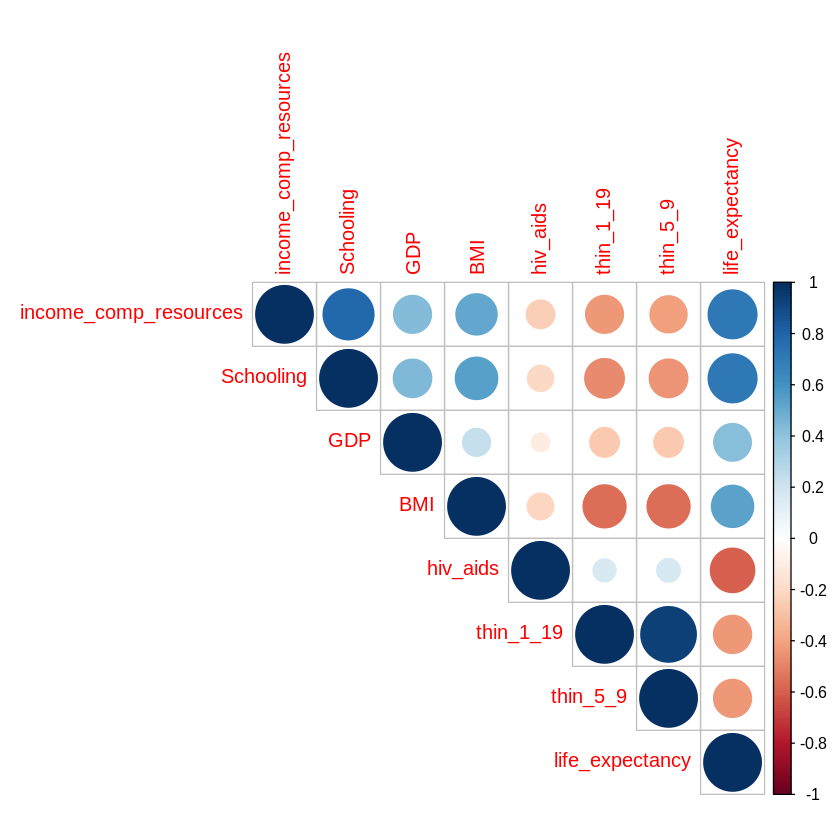

In [10]:
df_high_corr <- df_train %>%
    select(income_comp_resources, Schooling, GDP, BMI, hiv_aids, thin_1_19, thin_5_9, life_expectancy)

df_high_corr_plot <- corrplot(cor(df_high_corr), type="upper") # correlation plot of variables highly correlated with life exp

Above displays the correlation plot of variables with correlation to life expectancy greater than 4.2

In [11]:

df_high_corr_status <- df_train %>% select(Status, income_comp_resources, Schooling, GDP, BMI, hiv_aids, thin_1_19, thin_5_9, life_expectancy)

df_high_corr_dev <- df_high_corr_status %>% filter(Status == "Developed")
df_high_corr_undev <- df_high_corr_status %>% filter(Status == "Developing")

df_high_corr_dev <- df_high_corr_dev %>% select(-Status)
df_high_corr_undev <- df_high_corr_undev %>% select(-Status)

life_exp_developed <- cor(df_high_corr_dev)[,8] # correlation developed countries variables highly correlated with life exp
as.data.frame(life_exp_developed)





Warning message in cor(df_high_corr_dev):
“the standard deviation is zero”


,life_exp_developed
,<dbl>
income_comp_resources,0.710872307
Schooling,0.326733670
GDP,0.379554974
BMI,0.001955826
hiv_aids,NA
thin_1_19,-0.721853108
thin_5_9,-0.701826425
life_expectancy,1.000000000


In [12]:
life_exp_developing <- cor(df_high_corr_undev)[,8] # correlation developing countries variables highly correlated with life exp
as.data.frame(life_exp_developing)

,life_exp_developing
,<dbl>
income_comp_resources,0.6437323
Schooling,0.6607560
GDP,0.3981892
BMI,0.5185304
hiv_aids,-0.6198954
thin_1_19,-0.3538158
thin_5_9,-0.3507354
life_expectancy,1.0000000


### Visualizing relation between 2 predictors with the highest correlation with life expectancy:

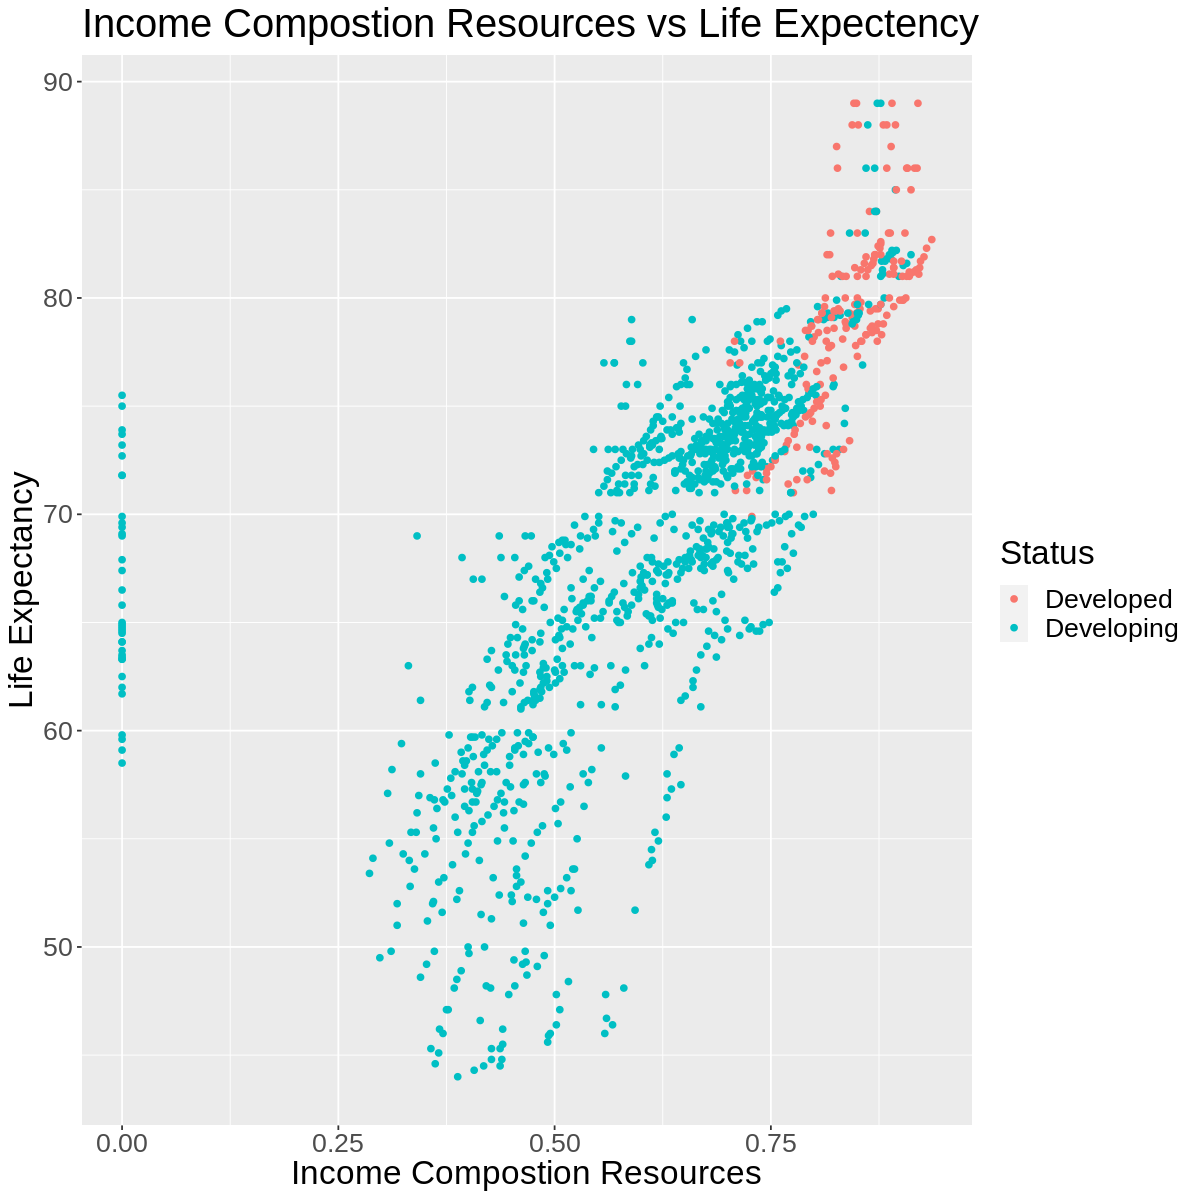

In [13]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(df_train, aes(x = income_comp_resources, y = life_expectancy)) +
    geom_point(aes(color = Status)) +
    xlab("Income Compostion Resources")+
    ylab("Life Expectancy")+
    ggtitle("Income Compostion Resources vs Life Expectency")+
    theme(text = element_text(size=20))

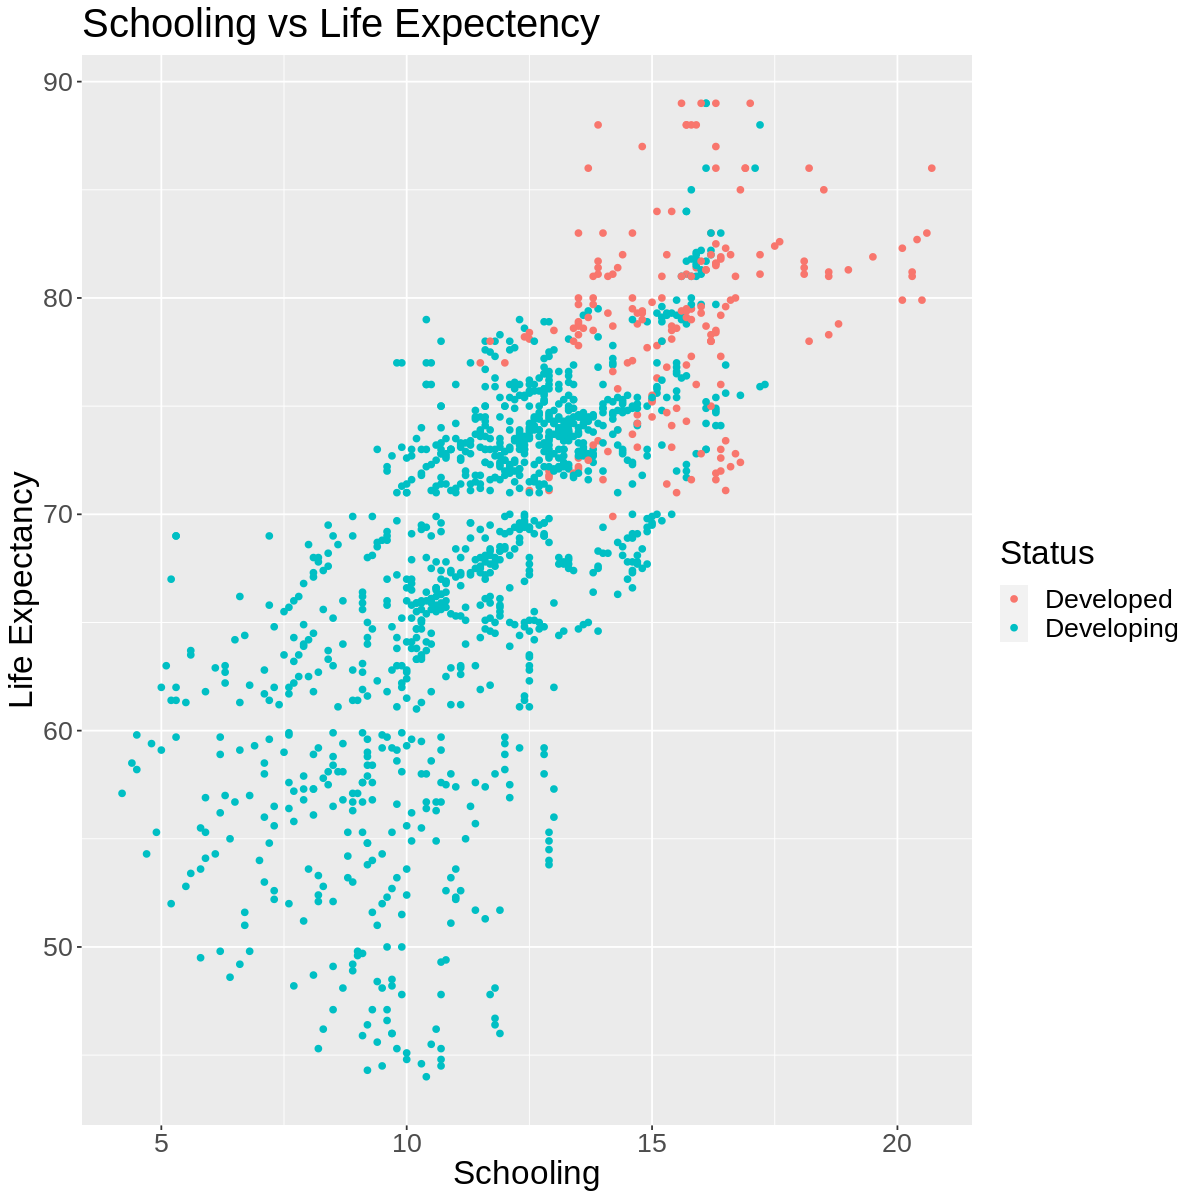

In [14]:
ggplot(df_train, aes(x = Schooling, y = life_expectancy)) +
    geom_point(aes(color = Status)) +
    xlab("Schooling")+
    ylab("Life Expectancy")+
    ggtitle("Schooling vs Life Expectency")+
    theme(text = element_text(size=20))

It appears the best two predictors for life expectancy will be schooling and income composition resources.

## Methods: Plan

<b>Methodology:<b>

After finalizing the data we are going to use (we have already conducted the preliminary cleaning/filtering), we are going to determine which explanatory variables best fit the regression model. In order to do so, we will divide our data into a test set and a training set (ratio of split is yet to be determined), and then run the stepwise forward selection algorithm on the training data, which we will likely implement using leaps’s regsubsets() function, which will allow us to explore and determine which variables create the best fitting model. The exact method for determining the best model has yet to be determined, but will  involve the use of metrics such as Mallow’s Cp, AIC, and BIC. Once we have our selected model, we can train it using R’s lm() function (using the training set), and use it to predict the average life expectancy in the test set. In order to evaluate the predictive model, we will compute the RMSE and coefficient of determination.  Furthermore, we will check LR assumptions, including, but not limited to,  checking residual plots for homoscedasticity/heteroscedasticity, and checking Q-Q plots for the error normality assumption. Lastly, it is important to note that although this is the proposed methodology, many minor (at least more minor than the steps mentioned) details/nuances have been withheld for 1. Limited word count, 2. The methodology will evolve and change during the actual analysis. 

<b> What do we expect to achieve and what impact could such findings have? <b>

As a group, we hope and expect to create a well fitting model that can accurately predict average life expectancy and identify which are the most important factors in estimating/predicting life expectancy. Through conducting our analysis and variable exploration, we hope that our findings will deepen others' understanding of factors that influence health/life expectancy, and allow others to make better informed life decisions. 


## References

1. Avendano M, Kawachi I(2022). Why do Americans have shorter life expectancy and worse health than do people in other high-income countries? Annu Rev Public Health. 2014;35:307-25. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4112220/


2. Fadnes LT, Økland J-M, Haaland ØA, Johansson KA (2022). Estimating impact of food choices on life expectancy: A modeling study. PLoS Med 19(3): e1003962. https://doi.org/10.1371/journal.pmed.1003962


3. Freeman, T., Gesesew, H.A., Bambra, C. et al (2020). Why do some countries do better or worse in life expectancy relative to income? An analysis of Brazil, Ethiopia, and the United States of America. Int J Equity Health 19, 202.
https://equityhealthj.biomedcentral.com/articles/10.1186/s12939-020-01315-z#cities
KumarRajarshi. (2018, February 10). Life expectancy (WHO). Kaggle. Retrieved November 9, 2022, from https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who 